# Download DeepGIS LROC NAC Image annotations

### Delete any previous contents

In [ ]:
rm -rf json/ labels/ images/ dataset.zip sample_data

### Download DeepGIS dataset

In [ ]:
! wget https://lroc-nac.deepgis.org/media/labels/ethan_new_account/oabrScFABSbGmIDE/dataset.zip

--2020-11-12 20:42:03--  https://lroc-nac.deepgis.org/media/labels/ethan_new_account/oabrScFABSbGmIDE/dataset.zip
Resolving lroc-nac.deepgis.org (lroc-nac.deepgis.org)... 129.219.113.11
Connecting to lroc-nac.deepgis.org (lroc-nac.deepgis.org)|129.219.113.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816974 (798K) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 797.83K  2.65MB/s    in 0.3s    

2020-11-12 20:42:04 (2.65 MB/s) - ‘dataset.zip’ saved [816974/816974]



In [ ]:
! unzip dataset.zip

Archive:  dataset.zip
   creating: images/
   creating: json/
  inflating: json/tile_0_25900_0_0.json  
  inflating: json/tile_0_17150_0_0.json  
  inflating: json/tile_0_13300_0_0.json  
  inflating: json/tile_0_31150_0_0.json  
  inflating: json/tile_0_28000_0_0.json  
  inflating: json/tile_0_11200_0_0.json  
  inflating: json/tile_0_19950_0_0.json  
  inflating: json/tile_0_18550_0_0.json  
  inflating: json/tile_0_0_0_0.json  
  inflating: json/tile_0_700_0_0.json  
  inflating: json/tile_0_16450_0_0.json  
  inflating: json/tile_0_7350_0_0.json  
  inflating: json/tile_0_10500_0_0.json  
  inflating: json/tile_0_29050_0_0.json  
  inflating: json/tile_0_7000_0_0.json  
  inflating: json/tile_0_32200_0_0.json  
  inflating: images/tile_0_13300_0_0.png  
  inflating: images/tile_0_10500_0_0.png  
  inflating: images/tile_0_7350_0_0.png  
  inflating: images/tile_0_0_0_0.png  
  inflating: images/tile_0_700_0_0.png  
  inflating: images/tile_0_17150_0_0.png  
  inflating: images/til

# Import libraries

### Download Utils code

In [ ]:
! wget https://download.openuas.us/drive-download-20200923T063621Z-001.zip

--2020-11-12 20:42:04--  https://download.openuas.us/drive-download-20200923T063621Z-001.zip
Resolving download.openuas.us (download.openuas.us)... 129.219.113.11
Connecting to download.openuas.us (download.openuas.us)|129.219.113.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28930 (28K) [application/zip]
Saving to: ‘drive-download-20200923T063621Z-001.zip’

drive-download-2020 100%[===================>]  28.25K  --.-KB/s    in 0s      

2020-11-12 20:42:04 (62.9 MB/s) - ‘drive-download-20200923T063621Z-001.zip’ saved [28930/28930]



In [ ]:
! unzip drive-download-20200923T063621Z-001.zip

Archive:  drive-download-20200923T063621Z-001.zip
   creating: drive-download-20200923T063621Z-001/
  inflating: drive-download-20200923T063621Z-001/coco_utils.py  
  inflating: drive-download-20200923T063621Z-001/crater_train.py  
  inflating: drive-download-20200923T063621Z-001/crater_infer.py  
  inflating: drive-download-20200923T063621Z-001/crater.py  
  inflating: drive-download-20200923T063621Z-001/utils.py  
  inflating: drive-download-20200923T063621Z-001/visualize.py  
  inflating: drive-download-20200923T063621Z-001/engine.py  
  inflating: drive-download-20200923T063621Z-001/model.py  
  inflating: drive-download-20200923T063621Z-001/coco_utils.pyc  
  inflating: drive-download-20200923T063621Z-001/coco_eval.py  
  inflating: drive-download-20200923T063621Z-001/transforms.py  


In [ ]:
! mv drive-download-20200923T063621Z-001/*.py .

### Convert json to numpy masks

In [ ]:
! pip install wand
! apt-get install libmagickwand-dev -y

     |████████████████████████████████| 143kB 5.6MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev liblqr-1-0
  liblqr-1-0-dev libmagickcore-6-arch-config libmagickcore-6-headers
  libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra libmagickcore-6.q16-dev
  libmagickwand-6-headers libmagickwand-6.q16-3 libmagickwand-6.q16-dev
  libpixman-1-dev librsvg2-dev libwmf-dev libwmf0.2-7 libxcb-shm0-dev
  poppler-data
Suggested packages:
  fonts-noto ghostscript-x libcairo2-doc inkscape libjxr-tools librsvg2-doc
  libwmf-doc libwmf0.2-7-gtk poppler-uti

In [ ]:
import os
import json
import re
import numpy as np
from wand.image import Image as WandImage
from wand.color import Color as WandColor
import io
import imageio
from bs4 import BeautifulSoup

In [ ]:
def image_string_to_SVG_string_file(svgStr):
    SVG_string_file = io.StringIO(svgStr)
    SVG_string_file.seek(0)
    return SVG_string_file.read().encode('utf-8')

def image_label_string_to_SVG_string(DBStr, height=None, width=None, x=0, y=0, keepImage=False):
    addedStr = DBStr
    #get the image path
    imagePath = ""
    imageString = ""
    if keepImage:
        imagePath = re.search('ns1:href="(.*)png"', DBStr)
        try:
            imagePath = imagePath.group(1)+"png"
        except AttributeError as e:
            imagePath = re.search('a0:href="(.*)png"', DBStr)
            imagePath = imagePath.group(1) + "png"

        imageWidth = re.search(r'width="(\d+)"', addedStr).group(1)
        imageHeight = re.search(r'height="(\d+)"', addedStr).group(1)

        imageString = '<defs><pattern id="backgroundImage" ' \
        'patternUnits="userSpaceOnUse" width="%s" height="%s">' \
        '<image xlink:href="%s" x="-%s" y="-%s" width="%s" height="%s"/>' \
        '</pattern></defs><rect id="background" fill="url(#backgroundImage)" '\
        'width="%s" height="%s"/>' % (width, height, imagePath, x, y, imageWidth, imageHeight, width, height)

    if height == None or width == None:
        image, height, width = SVGDimensions(DBStr)
        if not keepImage and image:
            addedStr = DBStr.replace(image, '')

    addedStr = re.sub(r'<image.+hidden"/>', '', addedStr)
    addedStr = addedStr.encode('utf-8')
    return '<?xml version="1.0" encoding="UTF-8" standalone="no"?>' \
           '<svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg"' \
           ' xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" xml:space="preserve" height="%s"' \
           ' width="%s">%s%s</svg>' % (height, width, imageString, addedStr)


In [ ]:
! rm -rf labels

In [ ]:
IMAGE_FILE_EXTENSION = ".png"

json_files = os.listdir('json/')

if not os.path.exists('labels/'):
    os.makedirs('labels/')

# IMPORTANT: Specify the category name
# Example
# non-crater = 0
# crater = 1
CATEGORY_NAME = "crater"

for json_file in json_files:
  with open('json/' + json_file) as f:
    data = json.load(f)
  
  outputFilenameNpy = 'labels/' + json_file[:-4] + 'npy'
  height = data["height"]
  width = data["width"]
  ctr = 0
  total_paths = 500
  masks_ndarray = np.zeros((total_paths, height, width), dtype=np.int8)
  for id, element in data["labelShapes"]:
    # Only label in CATEGORY_NAME is considered
    if data["categories"][id] != CATEGORY_NAME:
      continue

    category_id = 1
    svg = element

    paths = []
    poly = []
    soup = BeautifulSoup(svg)
    circles = soup.find_all('circle')
    poly = soup.find_all('polygon')
    paths = soup.find_all('path')
    ellipse = soup.find_all('ellipse')
    shapes = paths + poly + circles + ellipse
    print(len(shapes))

    if len(paths) + len(poly) + len(circles) + len(ellipse) > 0:
      for idx,path in enumerate(shapes):
        img=WandImage(blob=image_string_to_SVG_string_file(image_label_string_to_SVG_string(str(path),height,width)))
        img.resize(width, height)
        img.background_color = WandColor('white')
        img.alpha_channel = 'remove'
        img.negate()
        img.threshold(0)
        img.format = 'png'

        outputFilename = ('labels/' + json_file[:-4] + 'png')

        img.save(filename=outputFilename)
        im = imageio.imread(outputFilename)

        masks = np.array(im)
        cat_mask = np.where(masks == 255, category_id , masks)

        if cat_mask.max() != 0:
          cat_mask_check = cat_mask > 0
          cat_mask_check = cat_mask_check.astype(np.uint8)
          pos = np.where(cat_mask_check)
          xmin = np.min(pos[1])
          xmax = np.max(pos[1])
          ymin = np.min(pos[0])
          ymax = np.max(pos[0])
          if xmin < xmax and ymin < ymax:
            masks_ndarray[ctr, :, :] = cat_mask
            ctr = ctr + 1
            # print(ctr)
            
  print(outputFilenameNpy)
  masks_ndarray.resize(ctr, height, width)
  masks_ndarray = masks_ndarray.transpose(1, 2, 0)
  np.save(outputFilenameNpy, masks_ndarray)

  for rmfile in os.listdir('labels/'):
      if rmfile.endswith('.png'):
          os.remove('labels/' + rmfile)    

54
labels/tile_0_7350_0_0.npy
54
labels/tile_0_10500_0_0.npy
171
labels/tile_0_700_0_0.npy
82
labels/tile_0_11200_0_0.npy
220
labels/tile_0_13300_0_0.npy
242
labels/tile_0_25900_0_0.npy
61
labels/tile_0_7000_0_0.npy
1
labels/tile_0_19950_0_0.npy
151
labels/tile_0_18550_0_0.npy
270
labels/tile_0_29050_0_0.npy
162
labels/tile_0_0_0_0.npy
359
labels/tile_0_31150_0_0.npy
65
labels/tile_0_28000_0_0.npy
103
labels/tile_0_16450_0_0.npy
86
labels/tile_0_17150_0_0.npy
194
labels/tile_0_32200_0_0.npy


# Visualize the mask and image files

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


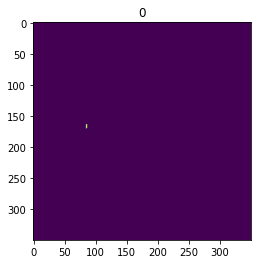

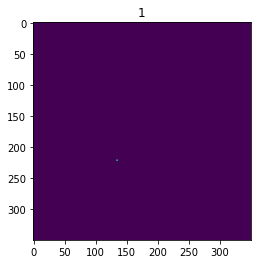

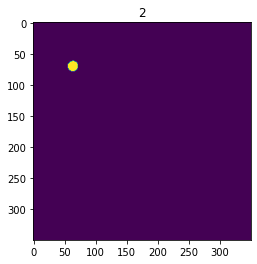

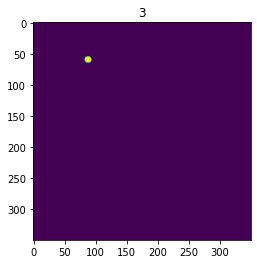

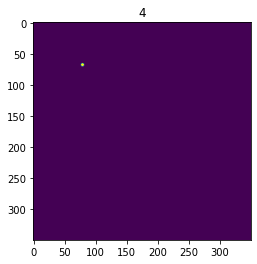

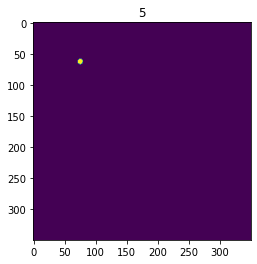

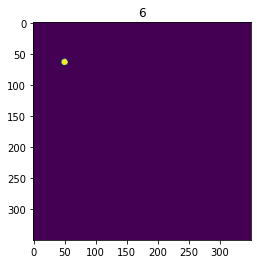

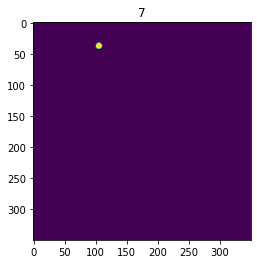

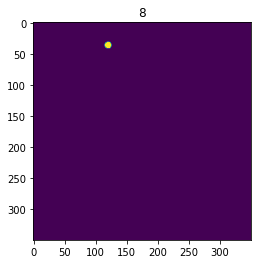

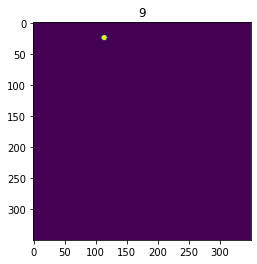

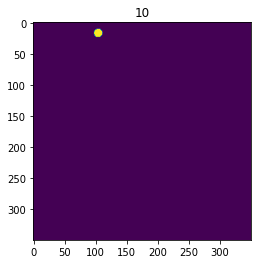

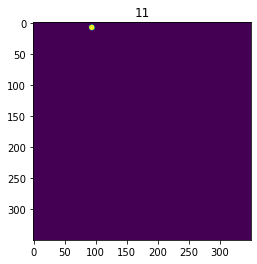

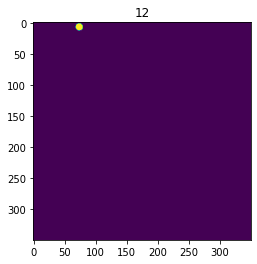

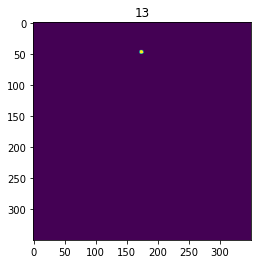

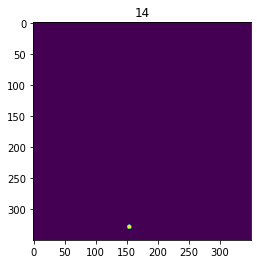

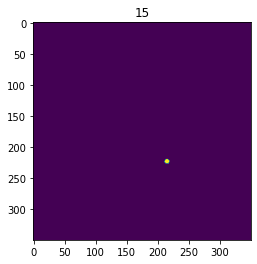

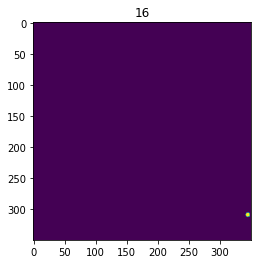

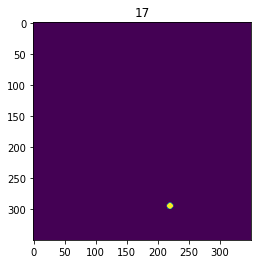

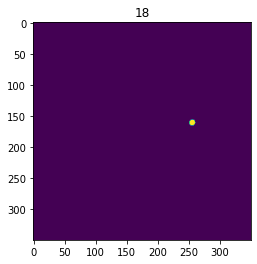

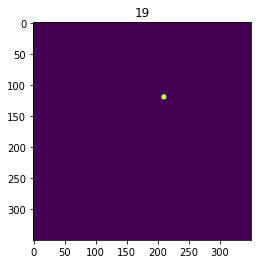

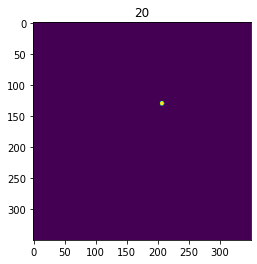

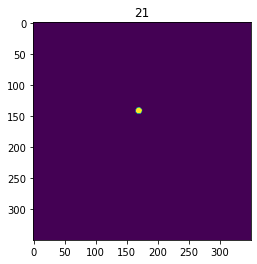

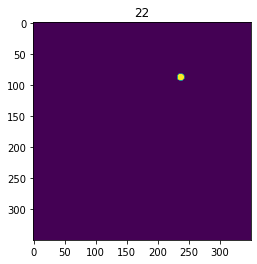

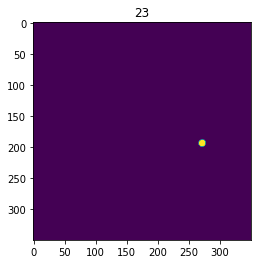

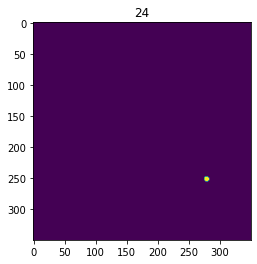

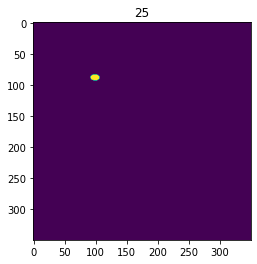

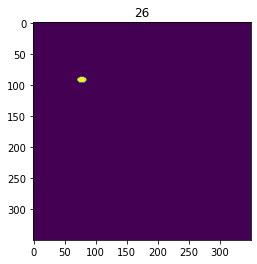

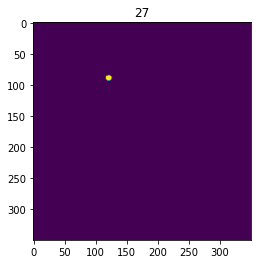

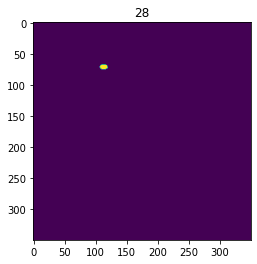

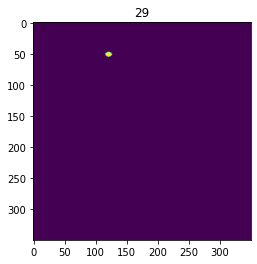

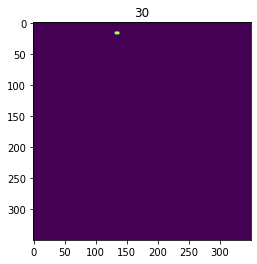

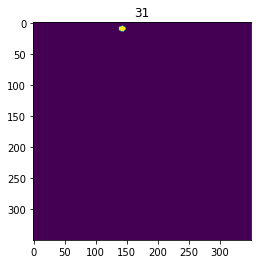

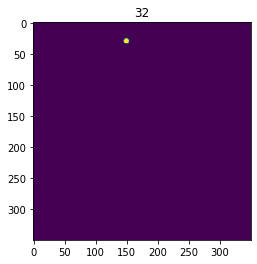

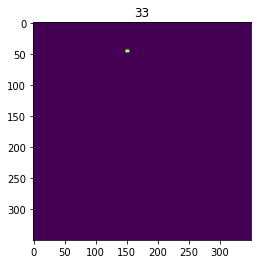

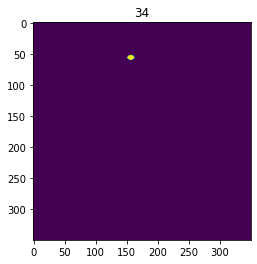

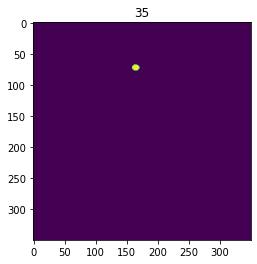

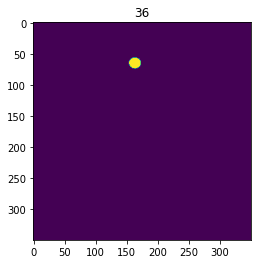

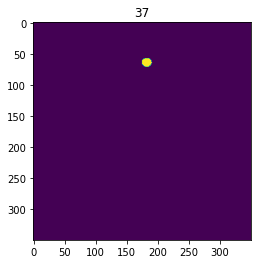

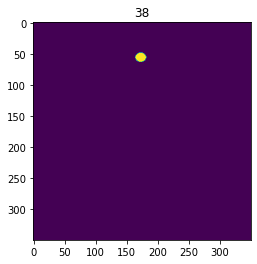

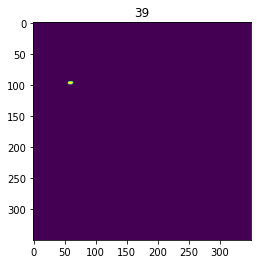

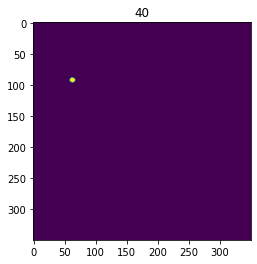

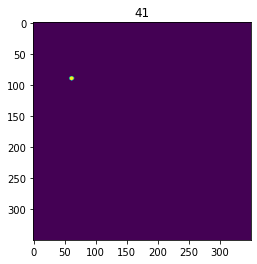

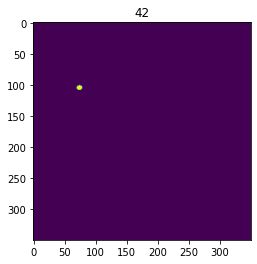

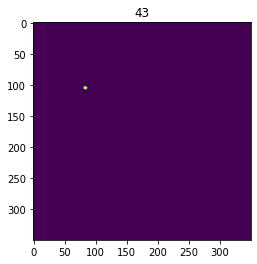

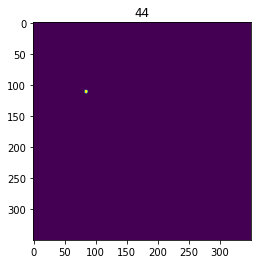

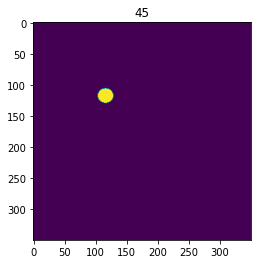

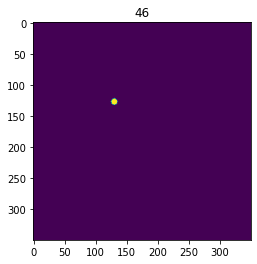

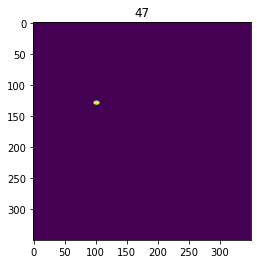

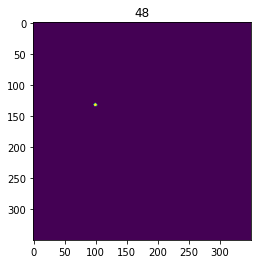

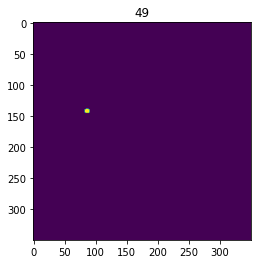

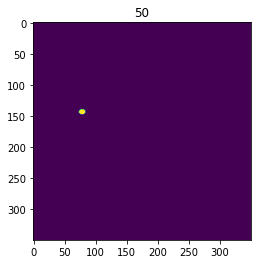

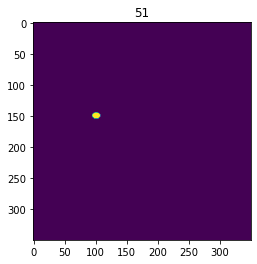

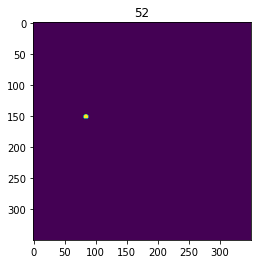

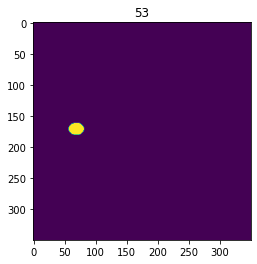

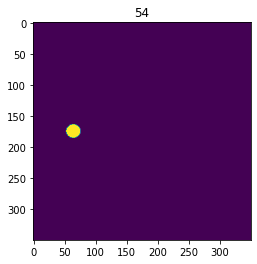

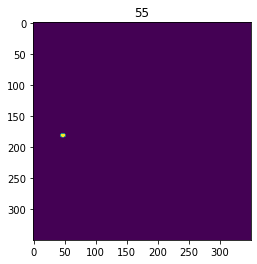

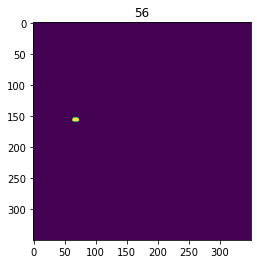

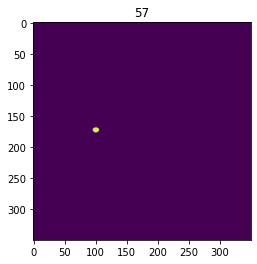

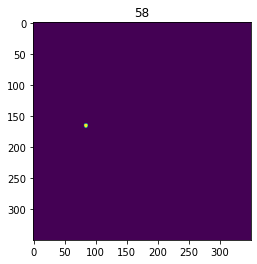

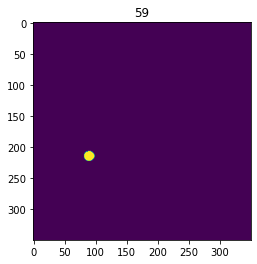

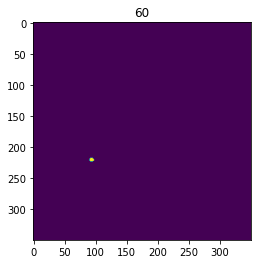

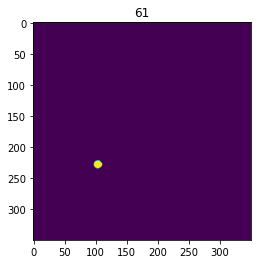

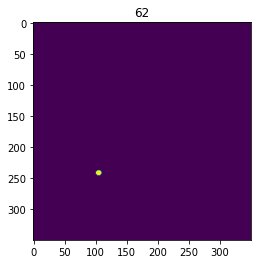

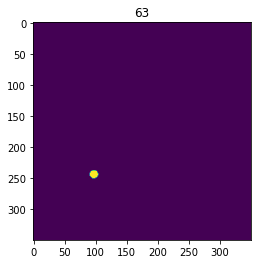

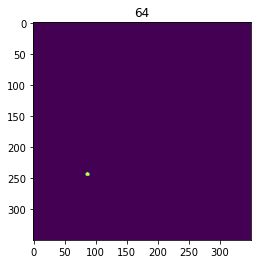

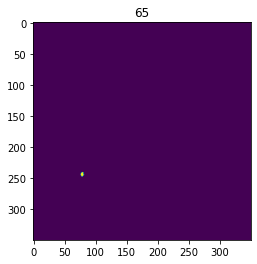

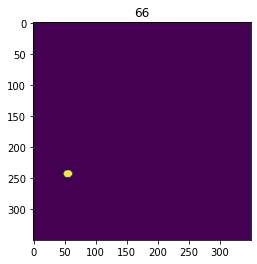

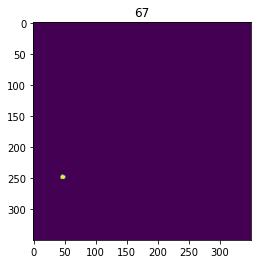

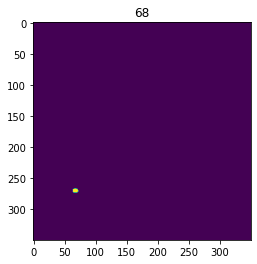

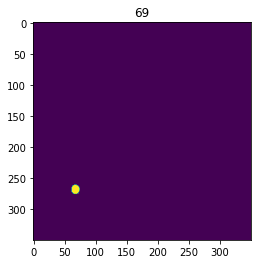

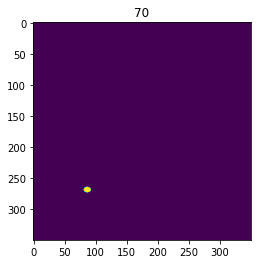

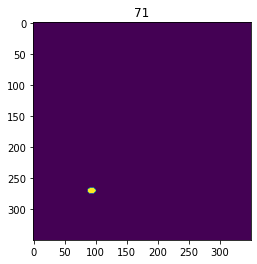

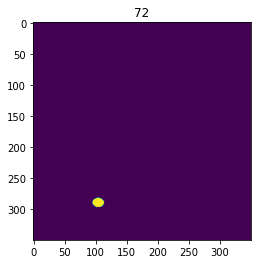

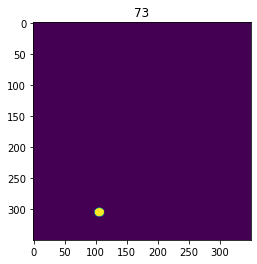

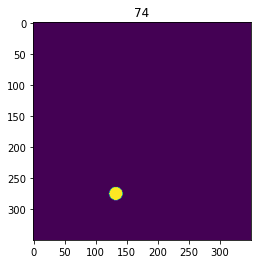

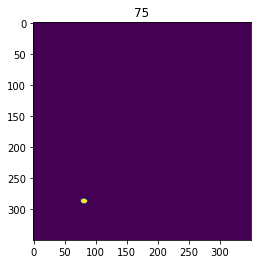

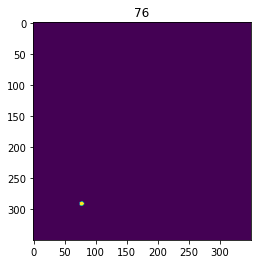

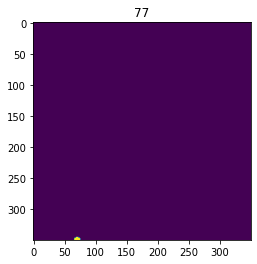

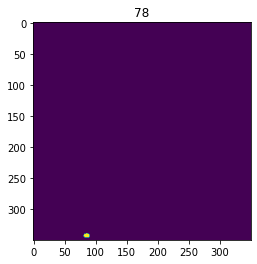

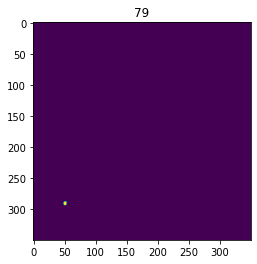

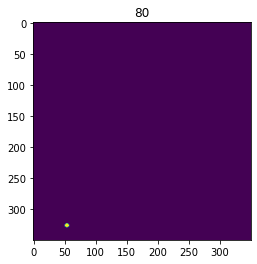

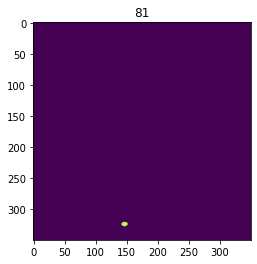

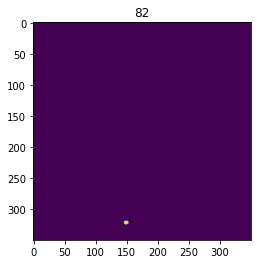

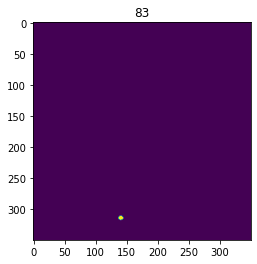

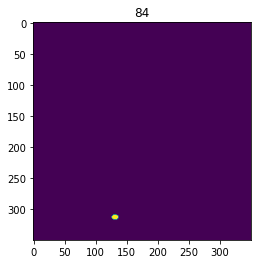

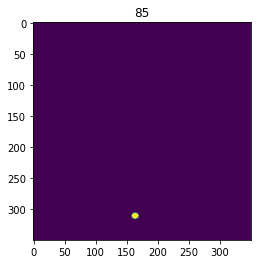

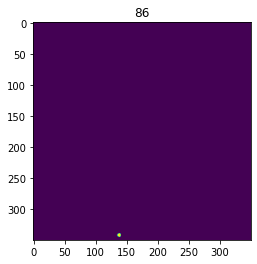

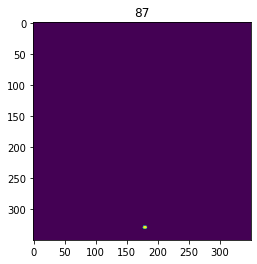

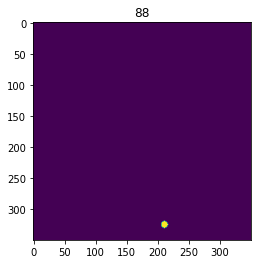

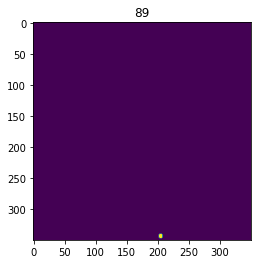

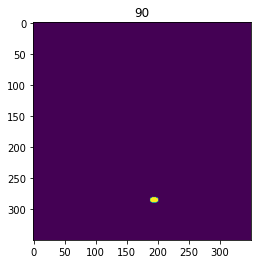

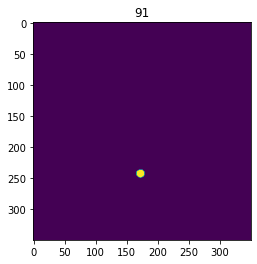

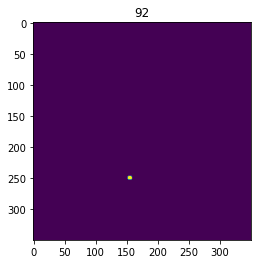

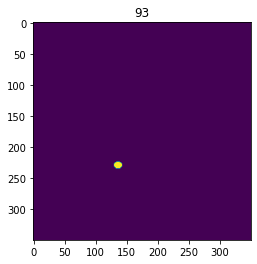

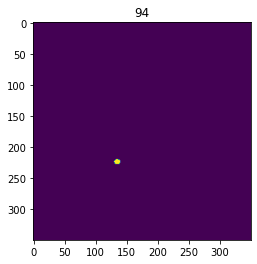

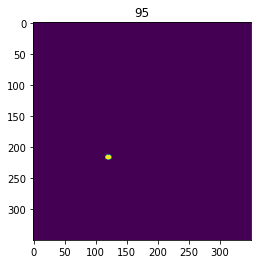

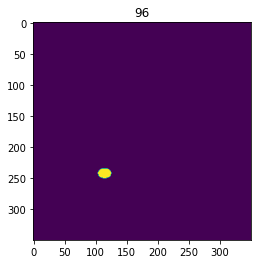

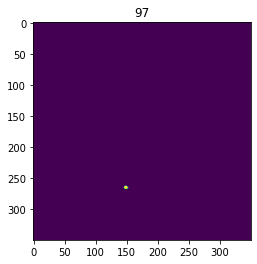

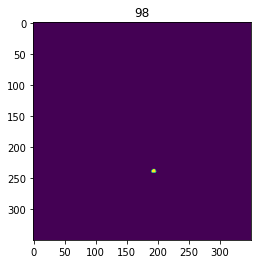

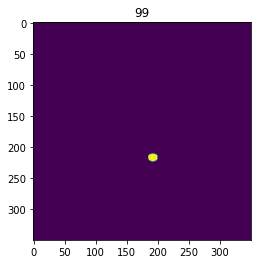

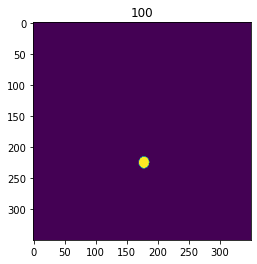

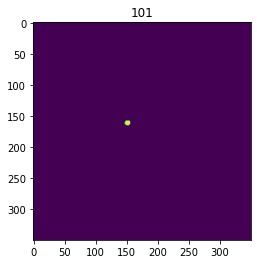

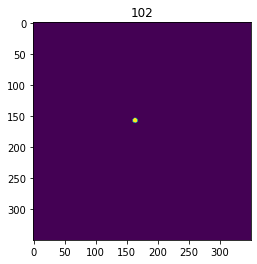

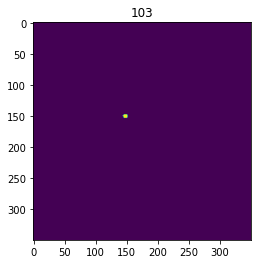

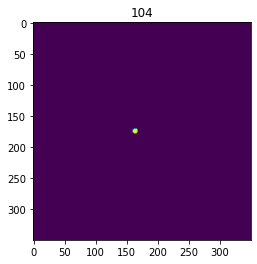

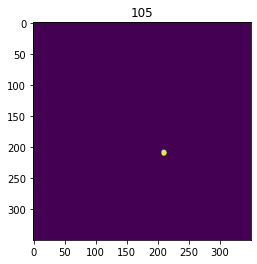

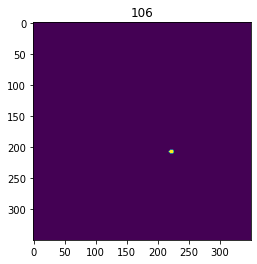

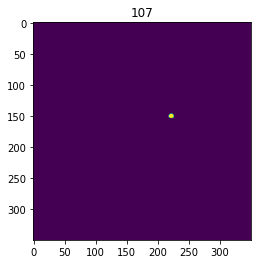

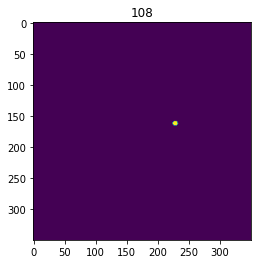

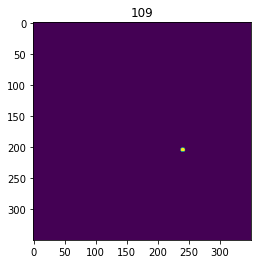

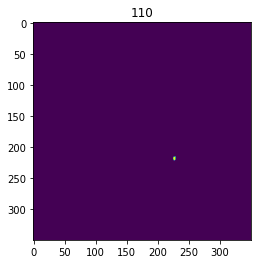

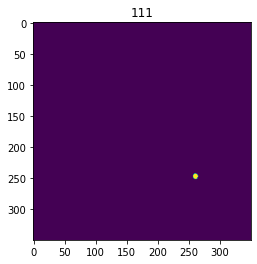

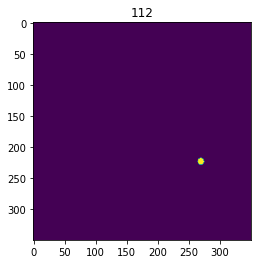

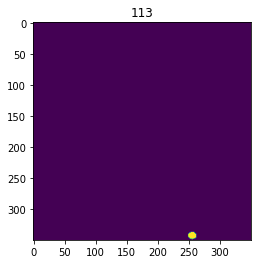

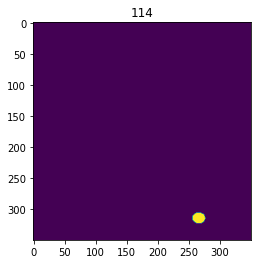

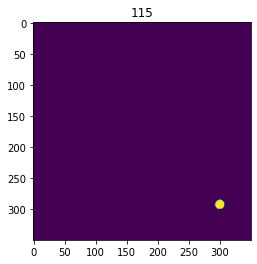

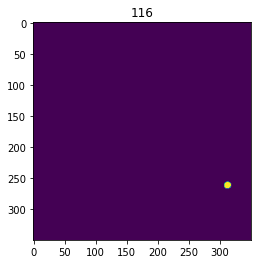

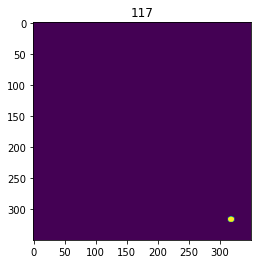

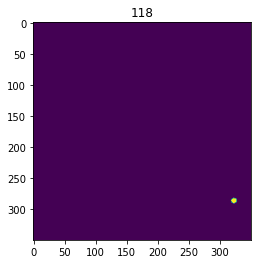

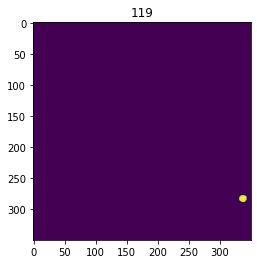

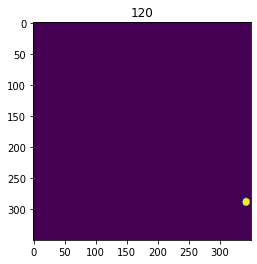

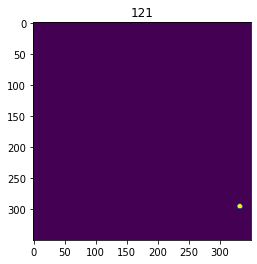

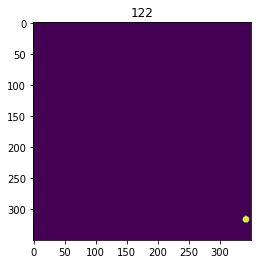

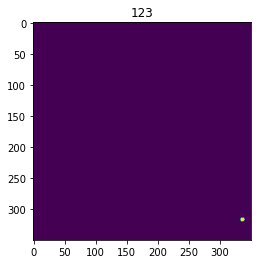

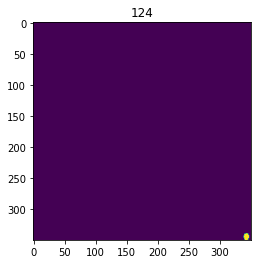

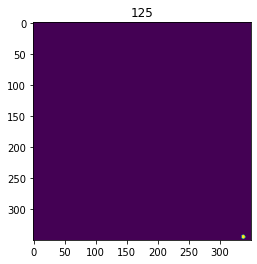

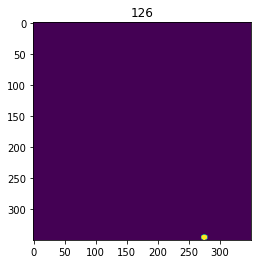

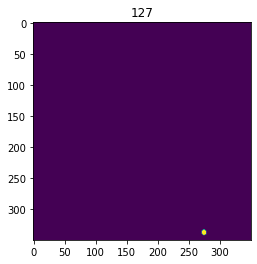

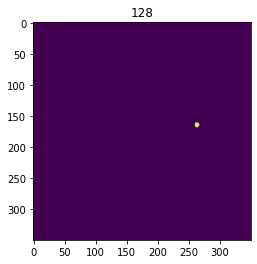

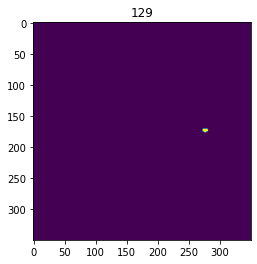

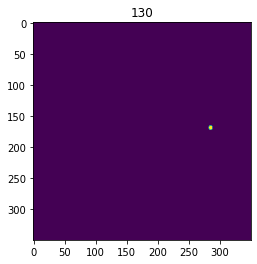

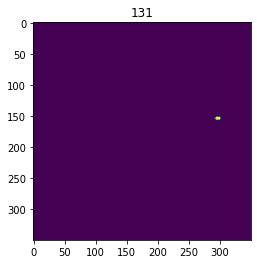

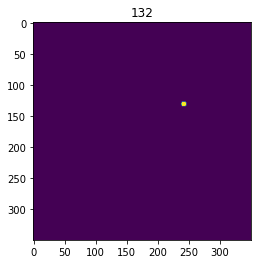

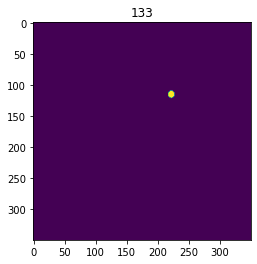

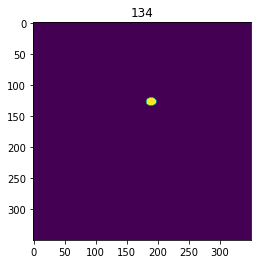

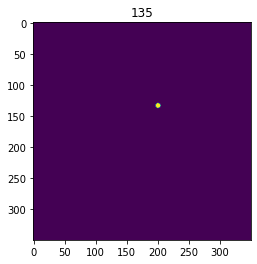

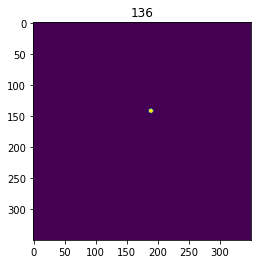

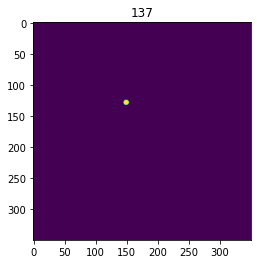

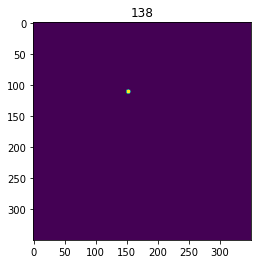

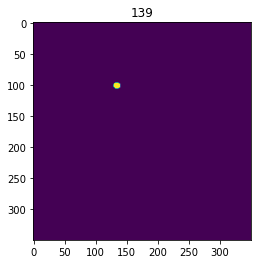

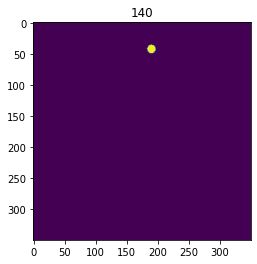

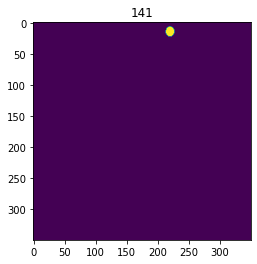

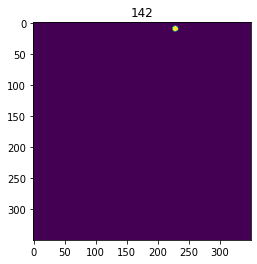

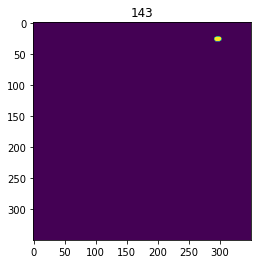

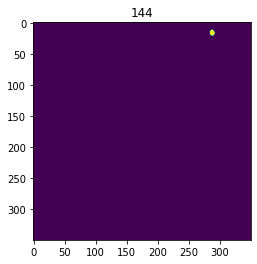

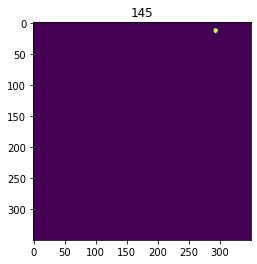

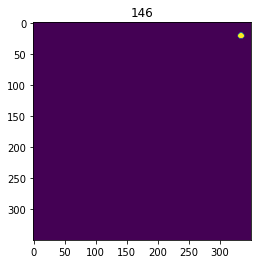

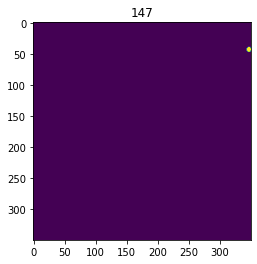

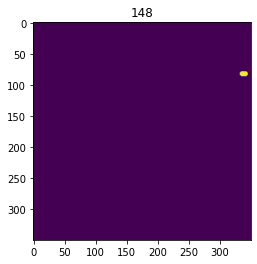

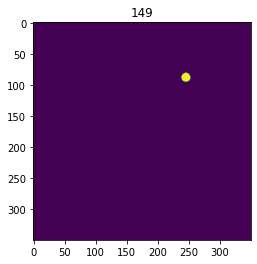

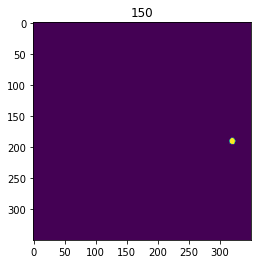

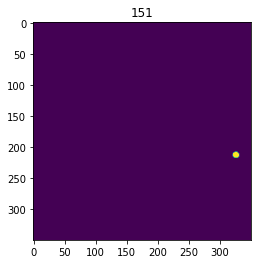

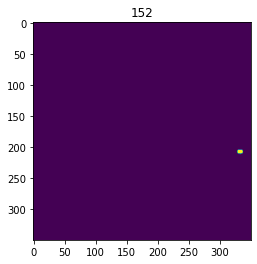

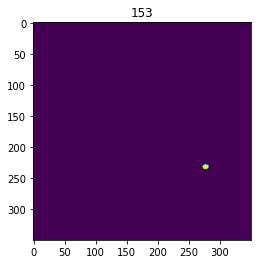

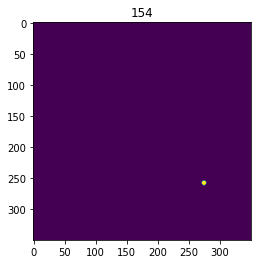

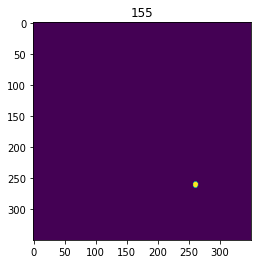

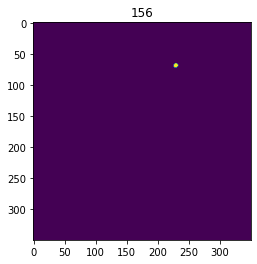

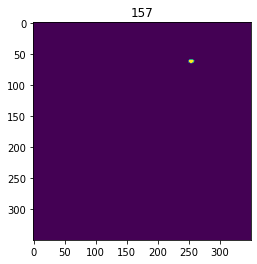

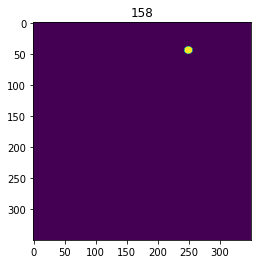

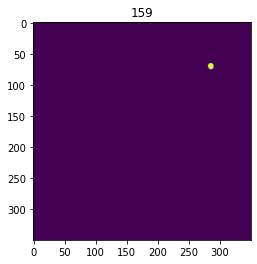

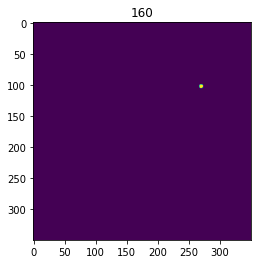

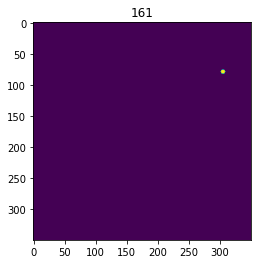

In [ ]:
a = np.load('labels/tile_0_0_0_0.npy')
# image = a[:, :,19]
# plt.imshow(image)
for i in range(a.shape[2]):
  plt.figure()
  plt.imshow(a[:, :,i])
  plt.title(str(i))

#plt.imsave('name.png', image)

(350, 350, 162)
0 1


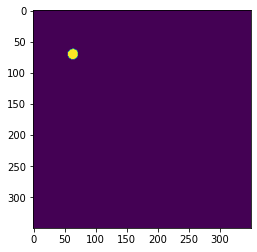

In [ ]:
a = np.load('labels/tile_0_0_0_0.npy')
print(a.shape) # Shape of the mask file (350, 350, # of craters)
print(np.min(a), np.max(a)) # Min and Max values in the mask
image = a[:, :, 2]
plt.imshow(image)
plt.imsave('name.png', image)

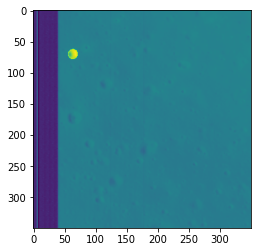

In [ ]:
img = Image.open("name.png")
background = Image.open("images/tile_0_0_0_0.png")
background.paste(img, (0, 0), background)
background.save('superimpose.png',"PNG")
img = mpimg.imread('superimpose.png')
imgplot = plt.imshow(img)

# Create TF Records

### Download TFRecorder code 

In [ ]:
! wget https://raw.githubusercontent.com/DREAMS-lab/data_augmentor/master/TFRecorder.py

--2020-11-12 20:44:08--  https://raw.githubusercontent.com/DREAMS-lab/data_augmentor/master/TFRecorder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7329 (7.2K) [text/plain]
Saving to: ‘TFRecorder.py’

TFRecorder.py       100%[===================>]   7.16K  --.-KB/s    in 0s      

2020-11-12 20:44:09 (82.3 MB/s) - ‘TFRecorder.py’ saved [7329/7329]



In [ ]:
import imp
import TFRecorder
imp.reload(TFRecorder)

<module 'TFRecorder' from '/content/TFRecorder.py'>

In [ ]:
tfrecorder = TFRecorder.TFConverter([b'crater'], "./labels", "./images")
tfrecorder.convert(gray_scale=True)

In [ ]:
! ls -alh tf.record

-rw-r--r-- 1 root root 1.3M Nov 12 20:44 tf.record
